<a href="https://colab.research.google.com/github/redstar19sg/commando-forest/blob/main/Capstone_project_Random_Forest_Classifier_on_cardiovascular_disease_dataset_(Jun_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Cardiovascular_Disease_Dataset.csv to Cardiovascular_Disease_Dataset.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

# Preprocessing
# Replace zeros in 'serumcholestrol' with median

In [4]:
data['serumcholestrol'] = data['serumcholestrol'].replace(0, data['serumcholestrol'].median())

# Define features and target

In [6]:
X = data.drop(['patientid', 'target'], axis=1)
y = data['target']


# Encode categorical variables

In [7]:
categorical_cols = ['gender', 'chestpain', 'restingrelectro', 'slope']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (optional for RF but included for consistency)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Using unscaled data as RF is less sensitive to scaling

RandomForestClassifier(random_state=42)

# Make predictions

In [11]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Evaluate the model on test set

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Random Forest Classifier Performance (Test Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Random Forest Classifier Performance (Test Set):
Accuracy: 0.9750
Precision: 0.9746
Recall: 0.9829
F1-Score: 0.9787
ROC AUC: 0.9988


# Cross-validation for robustness

In [14]:
cv_roc_auc = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print(f"\nCross-Validated ROC AUC Scores: {cv_roc_auc}")
print(f"Mean Cross-Validated ROC AUC: {cv_roc_auc.mean():.4f} (+/- {cv_roc_auc.std() * 2:.4f})")


Cross-Validated ROC AUC Scores: [0.99240558 1.         0.98876232 0.99984606 0.99743432]
Mean Cross-Validated ROC AUC: 0.9957 (+/- 0.0088)


# Plot 1: Confusion Matrix

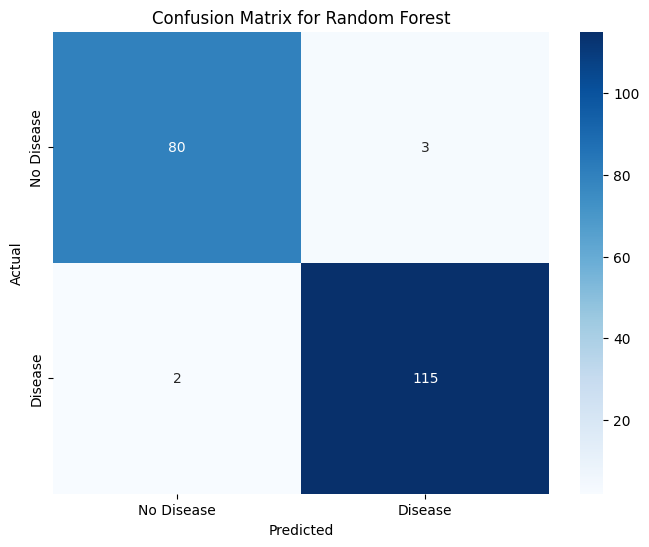

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot 2: ROC Curve

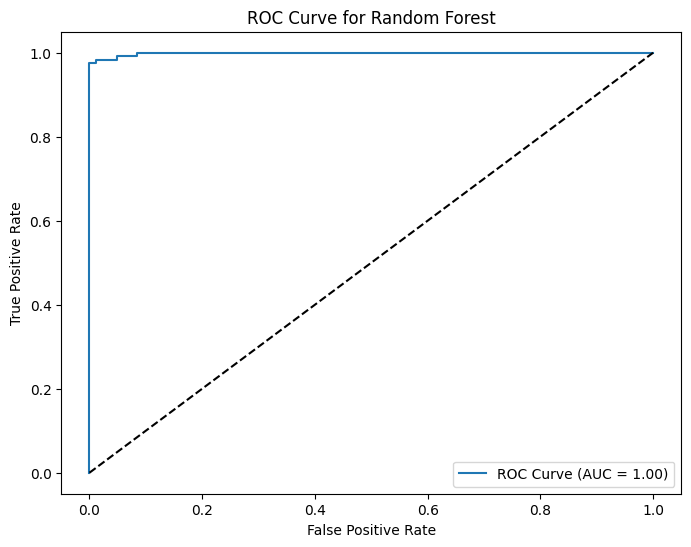

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Plot 3: Feature Importance

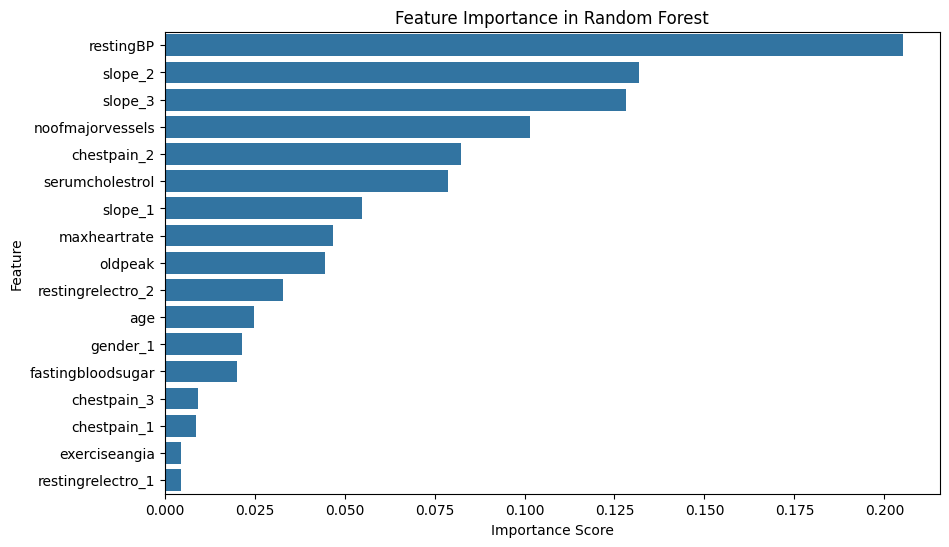

In [17]:
feature_names = X.columns
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()